In [1]:
# Adopted from https://github.com/spro66/ML-for--Bioacoustic-Classification/blob/main/Spectrogram_Generation.ipynb

# Importing packages
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.utils.data import DataLoader, Sampler

In [7]:
# Creating Dataloaders
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224,224)),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224,224)),
        transforms.Normalize([0.5], [0.5])
    ]),
}

data_dir = 'PATH'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1, shuffle=True
                                             )
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [10]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print("inputs' shape: ",inputs.shape)

inputs' shape:  torch.Size([1, 3, 224, 224])


inputs' shape:  torch.Size([1, 3, 224, 224])
(224, 224, 3)


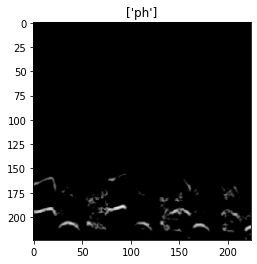

In [4]:
# Plotting the sample plots just for checking the image quality
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    print(inp.shape)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print("inputs' shape: ",inputs.shape)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [12]:
# The image files of generated spectrograms from spectrogram_generation.ipynb 
# are of one channels only - the resuls for the same are printed there.

# But, when we are reading them through Dataloaders, 
# the outputted ones are of 3 channels !